In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("Sleep_Health_and_Lifestyle_Dataset.csv")
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [65]:
df.tail(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
364,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
365,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
366,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
367,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
368,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Data Preprocessing

In [66]:
print(df.dtypes) #Printing the types of each feature 

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [67]:
def describe_new(df): #function that adds range to the .describe() table
    df1 = df.describe() #stores  the original .describe() into df1
    df1.loc["range"] = df1.loc['max'] - df1.loc['min'] #creates another row for the ranges and calculates it by substracting max and min
    return df1

print(describe_new(df))

              Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   
range   32.000000        2.700000          5.000000                60.000000   

       Stress Level  Heart Rate   Daily Steps  
count    374.000000  374.000000    374.000000  
mean       5.385027   70.165775   6816.844920  
std        1.774526    4.135676   1617.915679  
min    

In [68]:
#checking for missing values
missing_values = df.isnull().sum()
print(missing_values)


Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [69]:
#Checks the dataset for any NA values
print(df.isna().sum())

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [70]:
#Checking value counts of each variable in Occupations

#There were a couple instances were it said "Sales Representatives", we manually change those to "Salesperson"
#We also manually changed "Software Engineer" to just "Engineer"
print(df['Occupation'].value_counts())

Nurse          73
Doctor         71
Engineer       67
Lawyer         47
Teacher        40
Accountant     37
Salesperson    35
Scientist       4
Name: Occupation, dtype: int64


In [71]:
#Checking value counts of each variable in BMI Category
print(df['BMI Category'].value_counts()) 

#There were some instances were it said "Normal Weight" instead of Normal, we were able to manually change those
#One of the normal had a space, we couldnt find it manually so we used .replace(...) function to fix it
df = df.replace(['Normal '], 'Normal') 
print('\n', df['BMI Category'].value_counts()) 

Normal        215
Overweight    148
Obese          10
Normal          1
Name: BMI Category, dtype: int64

 Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64


##### Blood pressure was initially a string type, we wanted it to be a float, so we created a new dataframe splitting it in two, Upper and Lower pressure

In [72]:
#Splitting Blood Pressure to Upper Value and Lower Value
df1 = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df1 = df1.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})

#Changing Blood Pressure Upper and Lower Values to type float
df1['BloodPressure_Upper_Value'] = df1['BloodPressure_Upper_Value'].astype(float)
df1['BloodPressure_Lower_Value'] = df1['BloodPressure_Lower_Value'].astype(float)

df1

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,Male,27,Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,Male,28,Salesperson,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Salesperson,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0


In [73]:
df1.info() #function that shows all info of the database: # of tuples, # of columns, features, types, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     374 non-null    object 
 1   Age                        374 non-null    int64  
 2   Occupation                 374 non-null    object 
 3   Sleep Duration             374 non-null    float64
 4   Quality of Sleep           374 non-null    int64  
 5   Physical Activity Level    374 non-null    int64  
 6   Stress Level               374 non-null    int64  
 7   BMI Category               374 non-null    object 
 8   Heart Rate                 374 non-null    int64  
 9   Daily Steps                374 non-null    int64  
 10  Sleep Disorder             374 non-null    object 
 11  BloodPressure_Upper_Value  374 non-null    float64
 12  BloodPressure_Lower_Value  374 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 3

## Visualization of Data to find Coorelation

#### Heatmap of Numerical Attributes
Reveals the correlation of one numerical attribute to another. The closer it is to 1.00 and -1.00 the higher the coorelation the two features have towards each other

<Axes: >

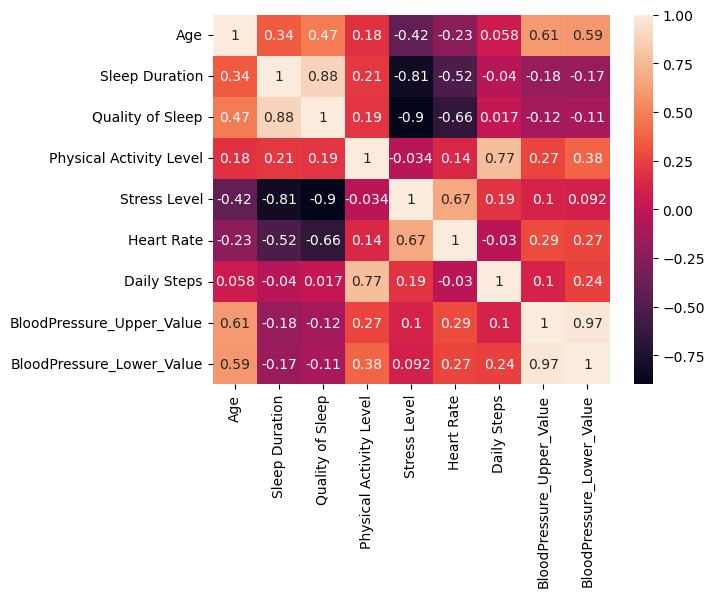

In [74]:
sns.heatmap(df1.corr(numeric_only = True), annot = True)

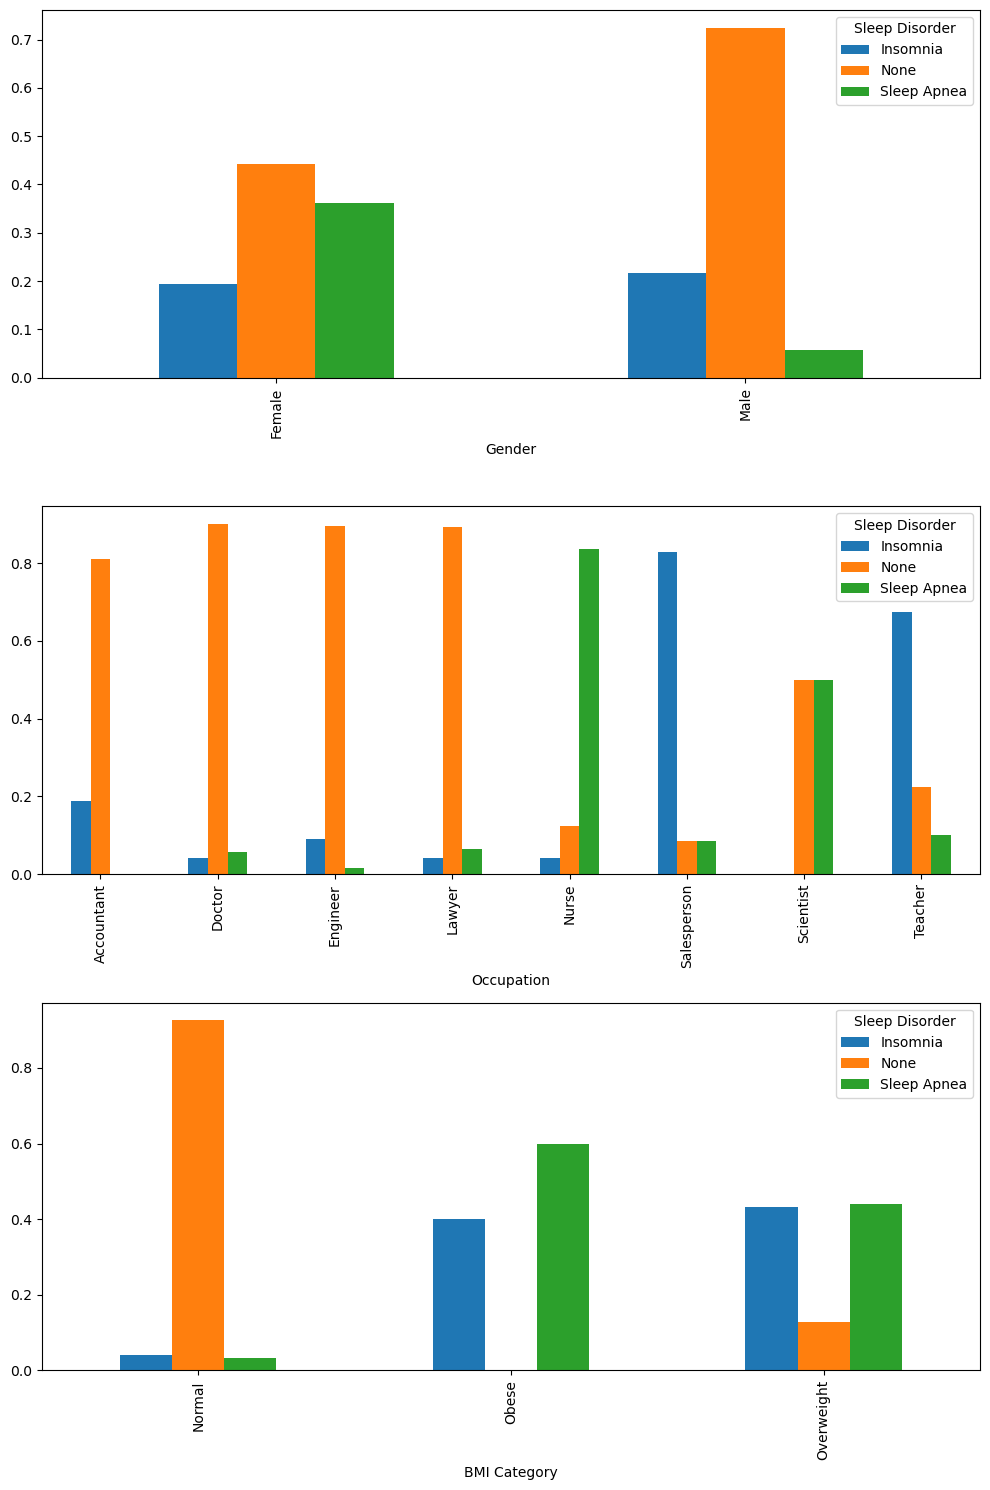

In [75]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

categorical_x = ["Gender", "Occupation", "BMI Category"]

for i,cat in enumerate(categorical_x):
    
    counts = (df1.groupby([cat])['Sleep Disorder']
                      .value_counts(normalize = True)
                      .unstack())

    counts.plot(kind='bar', ax=axs[i])
    
fig.tight_layout()

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Sleep Duration', ylabel='Age'>,
        <Axes: xlabel='Quality of Sleep', ylabel='Age'>,
        <Axes: xlabel='Physical Activity Level', ylabel='Age'>,
        <Axes: xlabel='Stress Level', ylabel='Age'>,
        <Axes: xlabel='Heart Rate', ylabel='Age'>,
        <Axes: xlabel='Daily Steps', ylabel='Age'>,
        <Axes: xlabel='BloodPressure_Upper_Value', ylabel='Age'>,
        <Axes: xlabel='BloodPressure_Lower_Value', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Sleep Duration'>,
        <Axes: xlabel='Sleep Duration', ylabel='Sleep Duration'>,
        <Axes: xlabel='Quality of Sleep', ylabel='Sleep Duration'>,
        <Axes: xlabel='Physical Activity Level', ylabel='Sleep Duration'>,
        <Axes: xlabel='Stress Level', ylabel='Sleep Duration'>,
        <Axes: xlabel='Heart Rate', ylabel='Sleep Duration'>,
        <Axes: xlabel='Daily Steps', ylabel='Sleep Duration'>,
        <Axes: xlabel='BloodPressure_U

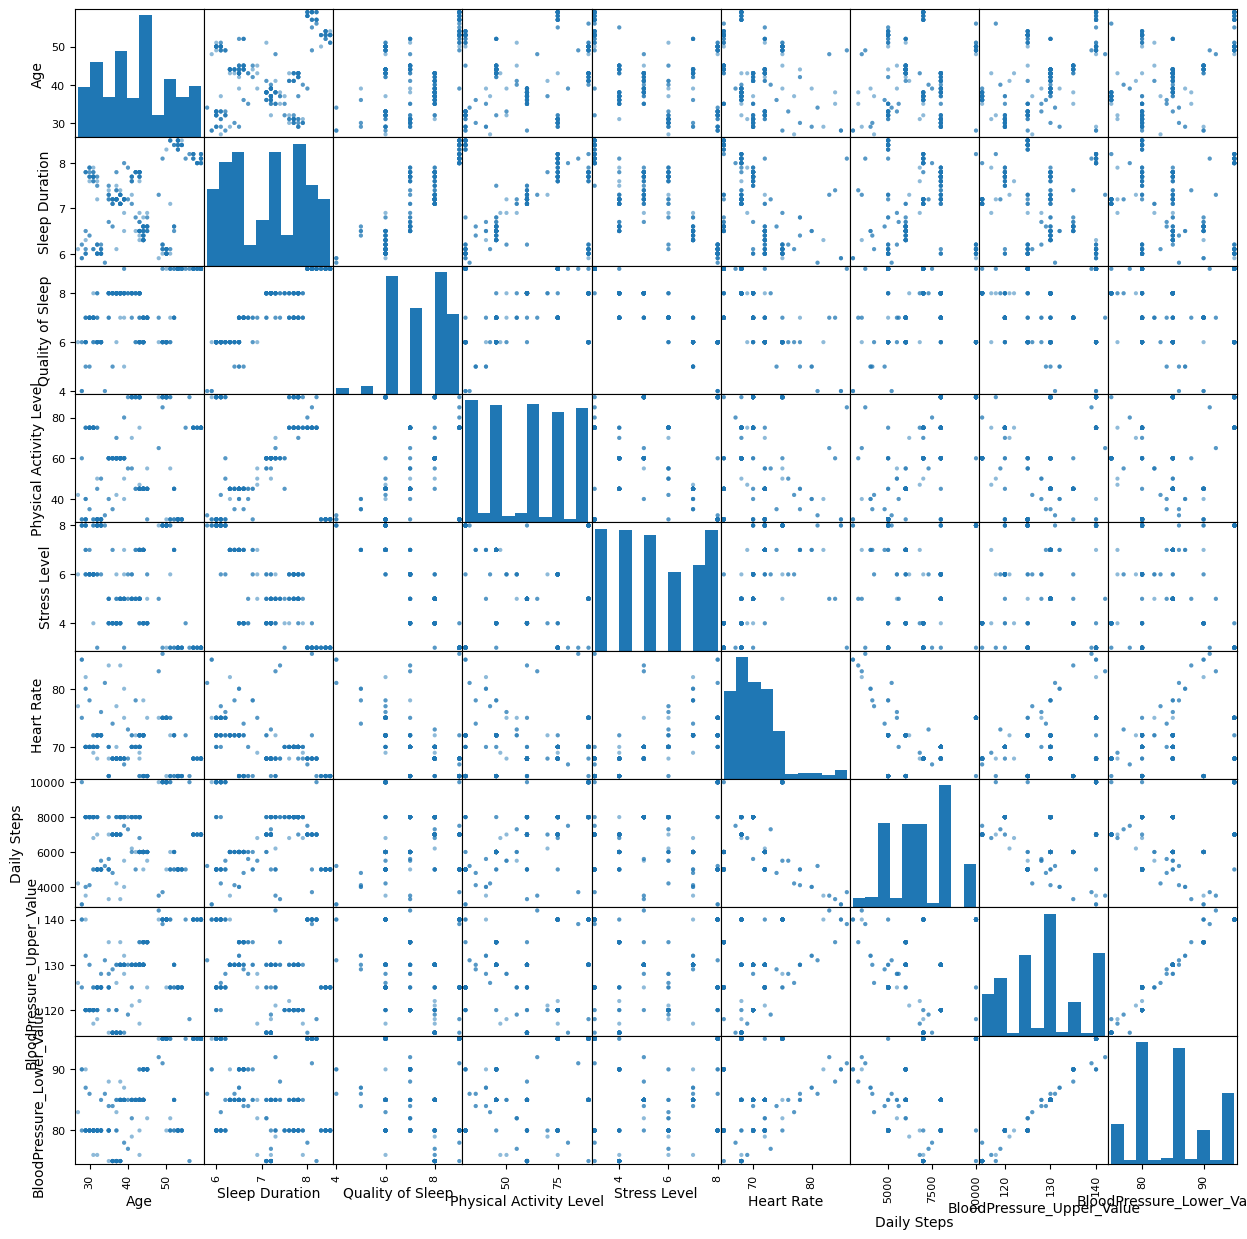

In [76]:
pd.plotting.scatter_matrix(df1, figsize = (15,15))

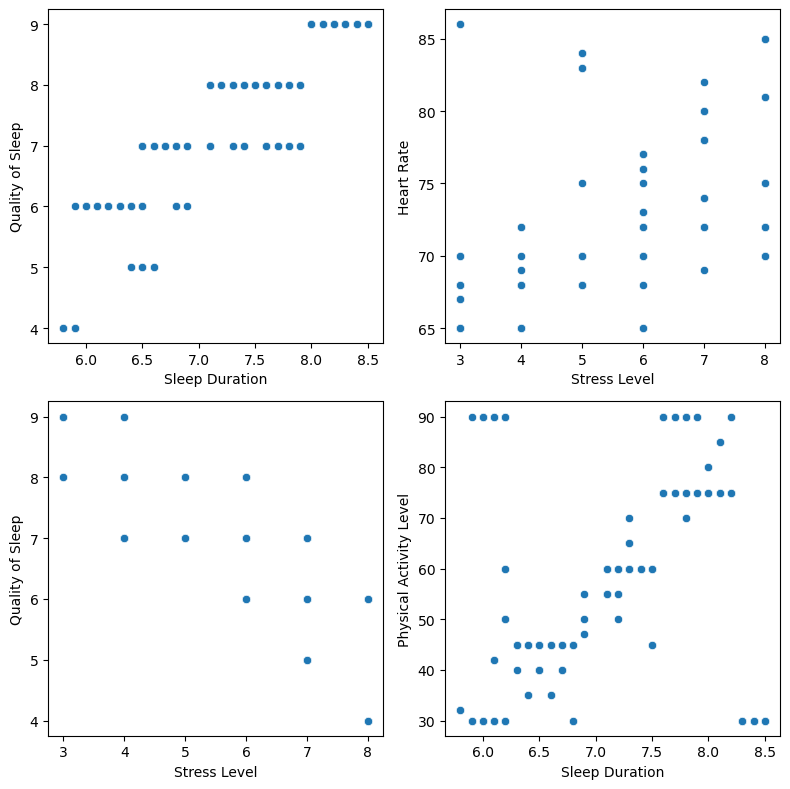

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))#Creates four separate boxplots, 
                                             #figsize enlarges the plots so that it is more visble

sns.scatterplot(df, x = 'Sleep Duration', y = 'Quality of Sleep', ax = axes[0,0])
sns.scatterplot(df, x = 'Stress Level', y = 'Quality of Sleep', ax = axes[1,0])
sns.scatterplot(df, x = 'Stress Level', y = 'Heart Rate', ax = axes[0,1])
sns.scatterplot(df, x = 'Sleep Duration', y = 'Physical Activity Level', ax = axes[1,1])

fig.tight_layout() #Separates the subplots so that they're not cramped together

<Axes: xlabel='Sleep Disorder', ylabel='BloodPressure_Lower_Value'>

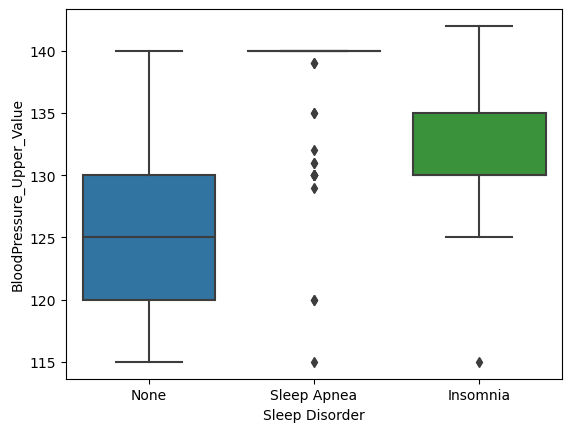

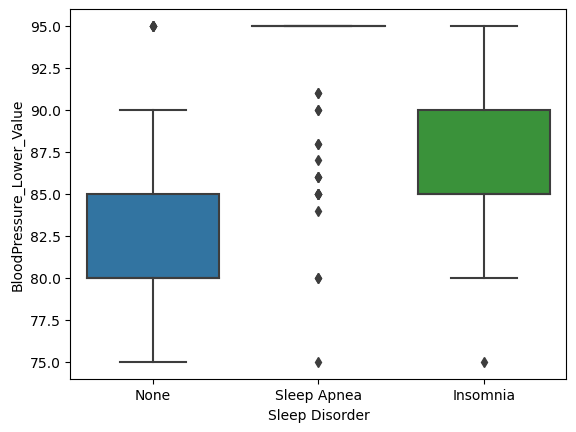

In [78]:

plt.figure(1)
sns.boxplot(data = df1, x = "Sleep Disorder", y = "BloodPressure_Upper_Value")

plt.figure(2)
sns.boxplot(data = df1, x = "Sleep Disorder", y = "BloodPressure_Lower_Value")
